## Prepare python environment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
random_state=5 # use this to control randomness across runs e.g., dataset partitioning

## Preparing the Glass Dataset (2 points)

We will use glass dataset from UCI machine learning repository. Details for this data can be found [here](https://archive.ics.uci.edu/ml/datasets/glass+identification). The objective of the dataset is to identify the class of glass based on the following features:

1.  RI: refractive index
2.  Na: Sodium
3.  Mg: Magnesium
4.  Al: Aluminum
5.  Si: Silica
6.  K: Potassium
7.  Ca: Calcium
8.  Ba: Barium
9.  Fe: Iron
10. Type of glass (Target label)

The classes of glass are:

1. building_windows_float_processed 
2. building_windows_non_float_processed 
3. vehicle_windows_float_processed 
4. containers 
6. tableware 
7. headlamps

Identification of glass from its content can be used for forensic analysis.


### Loading the dataset

In [ ]:
# Download and load the dataset
import os
if not os.path.exists('glass.csv'): 
    !wget https://raw.githubusercontent.com/JHA-Lab/ece364/main/dataset/glass.csv 
data = pd.read_csv('glass.csv')
# Display the first five instances in the dataset
data.head(5)

--2021-10-06 15:33:26--  https://raw.githubusercontent.com/JHA-Lab/ece364/main/dataset/glass.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9838 (9.6K) [text/plain]
Saving to: ‘glass.csv’

glass.csv           100%[===================>]   9.61K  --.-KB/s    in 0s      

2021-10-06 15:33:26 (58.7 MB/s) - ‘glass.csv’ saved [9838/9838]



,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# display some stats
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


#### Look at some statistics of the data using the `describe` function in pandas.

In [ ]:
data.describe()

In [ ]:
# Check type of data in each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### Visualize the Data

#### Check how many classes of each type of glass are there in the data. This has been done for you.

Text(0.5, 1.0, 'Count of Glass Types')

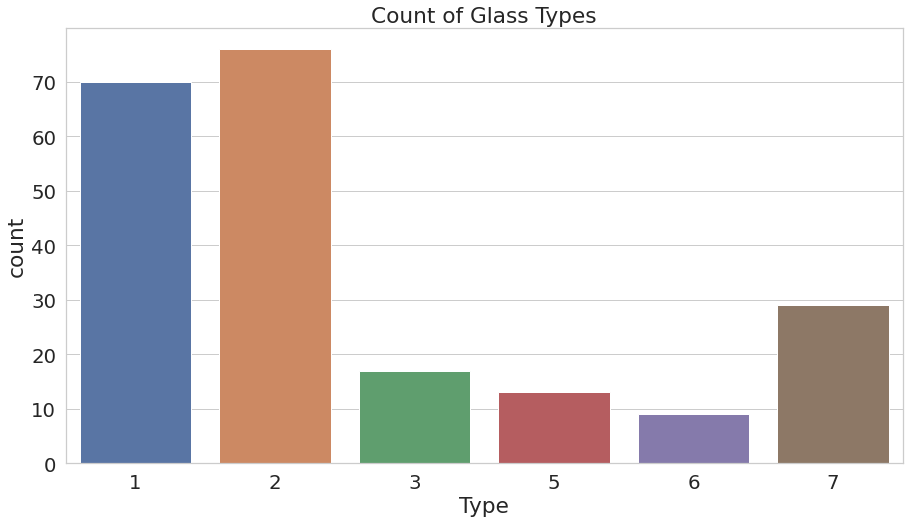

In [ ]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot(x='Type',data=data).set_title('Count of Glass Types')

#### Calculate `mean` material content for each kind of glass. This has been done for you

In [ ]:
# Compute mean material content for each kind of glass
data.groupby('Type', as_index=False).mean()

,Type,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000
1,2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


#### Create box plot to see distribution of each content in the glass. See [here](https://seaborn.pydata.org/generated/seaborn.boxplot.html) for further details. This has been done for you.

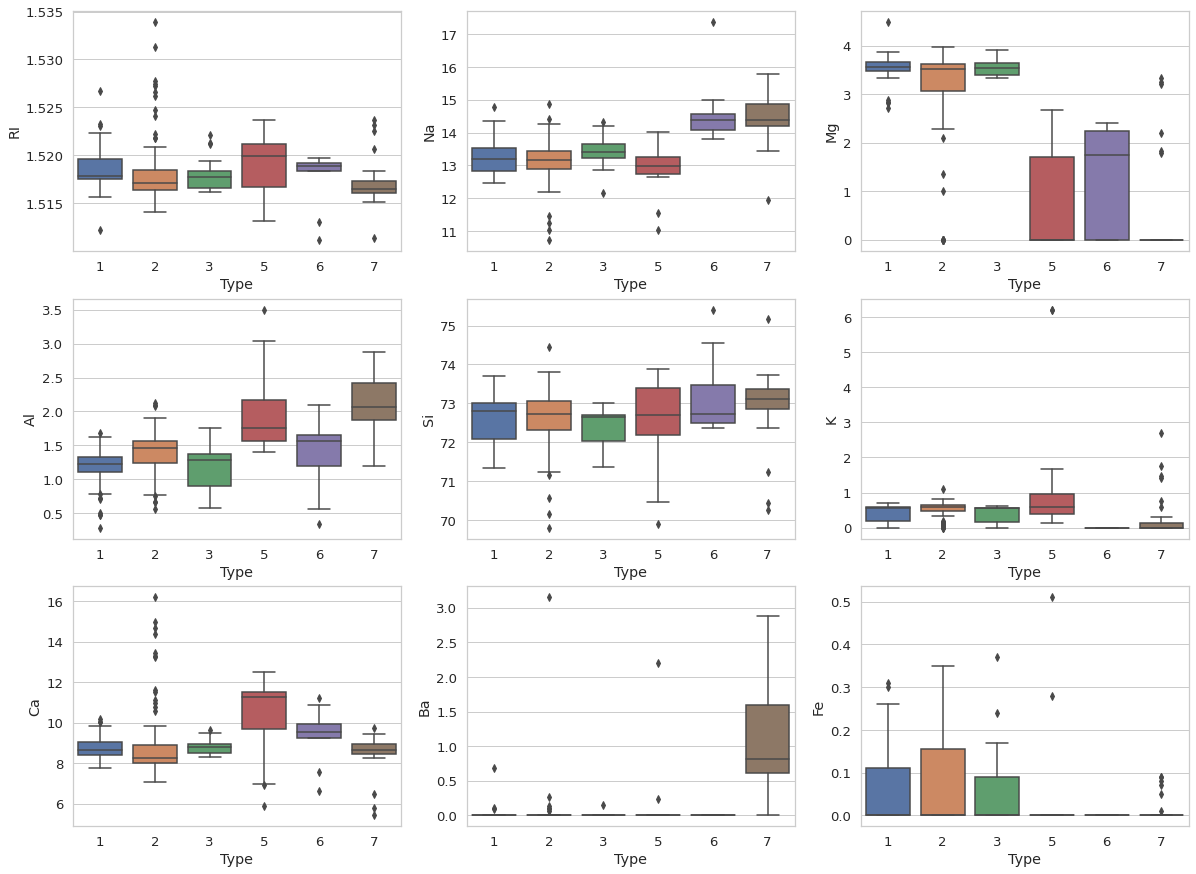

In [ ]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Type', y='RI', data=data)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Type', y='Mg', data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=data)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=data)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=data)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=data)
plt.show()

#### Create a pairplot to display pairwise relationship. See [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for further details. This has been done for you.

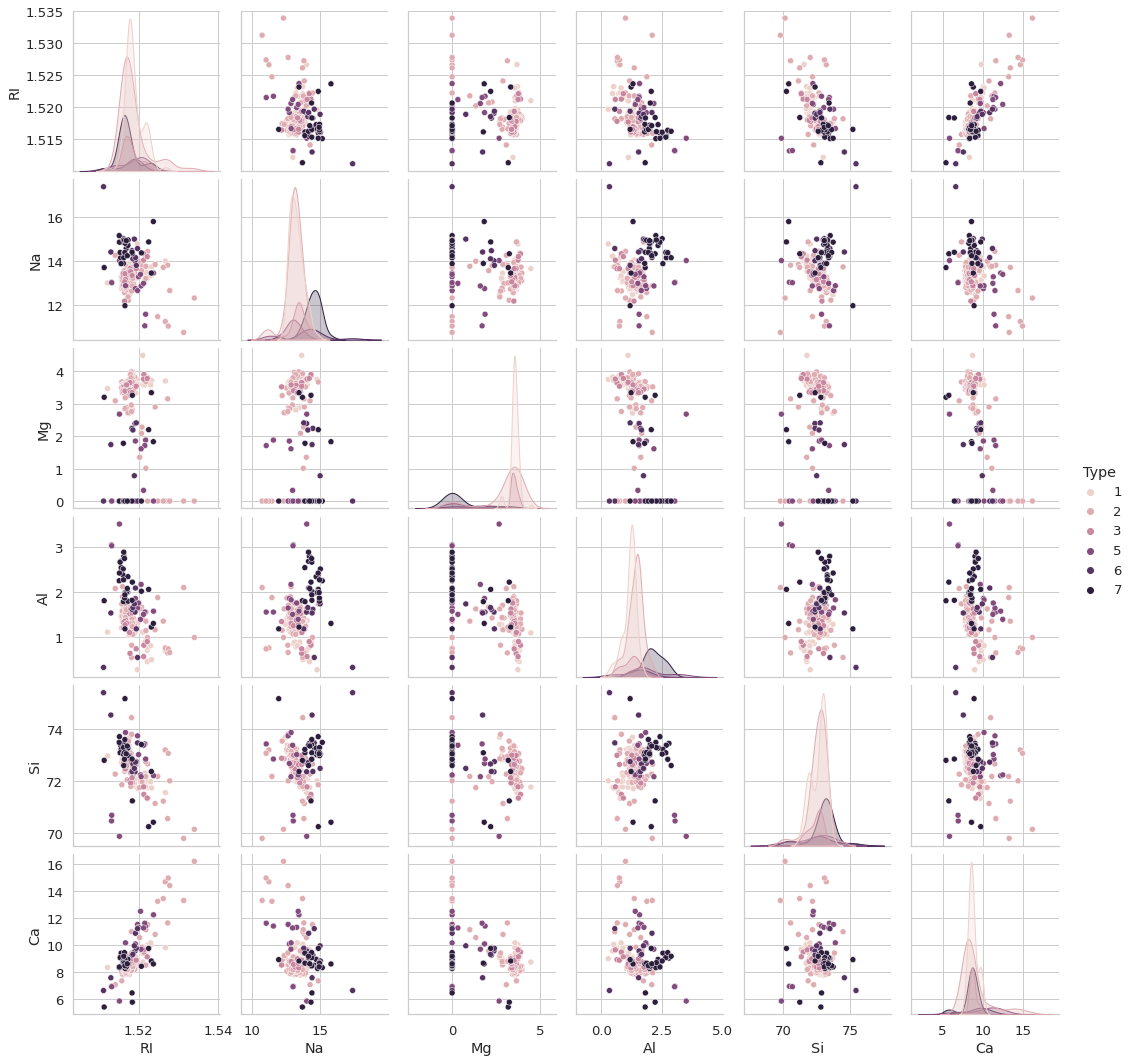

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
sns.pairplot(data[['RI','Na','Mg','Al','Si','Ca','Type']], hue='Type')

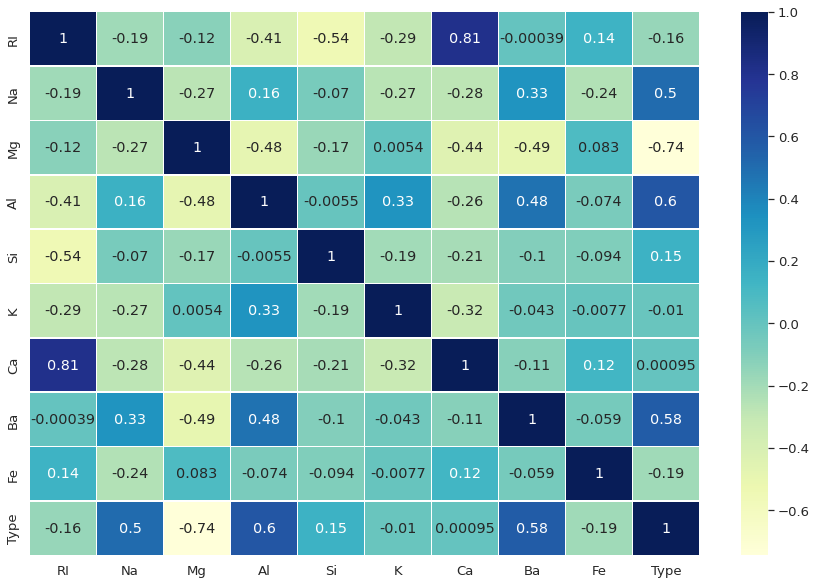

In [ ]:

# Plot heatmap showing correlation between different features
plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(),cmap='YlGnBu',annot=True, linewidth=.5)

### Extract target and descriptive features (1 point)




#### Add the following features to the dataset to model interactions between the pairs of glass materials. (See [here](https://cmdlinetips.com/2019/01/3-ways-to-add-new-columns-to-pandas-dataframe/) for an example.) 

    - Ca*Na
    - Al*Mg 
    - Ca*Mg
    - Ca*RI



In [ ]:
# Additional features to be added to the data
data['Ca_Na'] = data['Ca']*data['Na']# TODO
data['Al_Mg'] = data['Al']*data['Mg']# TODO
data['Ca_Mg'] = data['Ca']*data['Mg']# TODO
data['Ca_RI'] = data['Ca']*data['RI']# TODO

In [ ]:
data.columns.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type',
       'Ca_Na', 'Al_Mg', 'Ca_Mg', 'Ca_RI'], dtype=object)

In [ ]:
# Store all the features from the data in X
X= data.drop('Type',axis=1)# TODO
# Store all the labels in y
y= data['Type']# TODO

In [ ]:
# Convert data to numpy array
X = X.to_numpy()# TODO
y = y.to_numpy()# TODO

### Create training and validation datasets (1 point)


We will split the dataset into training and validation set. Generally in machine learning, we split the data into training,
validation and test set (this will be covered in later chapters). The model with best performance on the validation set is used to evaluate perfromance on 
the test set which is the unseen data. In this assignment, we will using `train set` for training and evaluate the performance on the `test set` for various 
model configurations to determine the best hyperparameters (parameter setting yielding the best performance).

Split the data into training and validation set using `train_test_split`.  See [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for details. To get consistent result while splitting, set `random_state` to the value defined earlier. We use 80% of the data for training and 20% of the data for validation. This has been done for you.

In [ ]:
X_train,X_test,y_train,y_test = # TODO

#### Preprocess the dataset by normalizing each feature to have zero mean and unit standard deviation. This can be done using `StandardScaler()` function. See [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for more details.

In [ ]:
# Define the scaler for scaling the data
scaler = # TODO

# Normalize the training data
X_train = # TODO

# Use the scaler defined above to standardize the validation data by applying the same transformation to the validation data.
X_test = # TODO


## Training K-nearest neighbor models (18 points)

#### We will use the `sklearn` library to train a K-nearest neighbors (kNN) classifier. Review ch.5 and see [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) for more details. 

### Exercise 1:  Learning a kNN classifier (18 points)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 

#### Exercise 1a: Evaluate the effect of the number of neighbors (6 points)

#### Train kNN classifiers with different number of neighbors among {1,5,25,100, length(X_train)}.

#### Keep all other parameters at their default values.  

#### Report the model's accuracy over the test set.
 

In [ ]:
# TODO

#### Explain the effect of increasing the number of neighbors on the performance observed on training and test sets. 

TO DO

#### Exercise 1b: Evaluate the effect of a weighted kNN (6 points)

#### Train kNN classifiers with distance-weighting and vary the  number of neighbors among {1,5,25,100,length(X_train)}.

#### Keep all other parameters at their default values.  

#### Report the model's accuracy over the test set.
 

In [ ]:
# TODO

#### Compare the effect of the number of neighbors on model performance (train and test) under the distance-weighted kNN against the uniformly weighted kNN. Explain any differences observed.

TO DO

#### Exercise 1c: Evaluate the effect of the power parameter in the Minkowski distance metric (6 points)

#### Train kNN classifiers with different distance functions by varying the power parameter for the Minkowski distance among {1,2,10,100}.

#### Fix the number of neighbors to be 25, and use the uniformly-weighted kNN. Keep all other parameters at their default values.  
#### Report the model's accuracy over the test set.

In [ ]:
# TODO

#### Explain any effect observed on the model performance upon increasing the power parameter. 

TO DO